In [1]:
from commons import *

In [2]:
FILE_CLASSIFIERS_DEFAULT = "data/rawruntimes/classifierresults-default.csv"
FILE_CLASSIFIERS_PARAMETRIZED = "data/rawruntimes/classifierresults-parametrized.csv"
FILE_PREPROCESSORS_DEFAULT = "data/rawruntimes/preprocessorresults-default.csv"
FILE_PREPROCESSORS_PARAMETRIZED = "data/rawruntimes/preprocessorresults-parametrized.csv"
FILE_METAFEATURES = "data/metafeatures.csv"
FILE_DATASETS = "data/datasets.csv"

# Read the Data Source Files

In [3]:
dfDatasets = pd.read_csv(FILE_DATASETS)
dfMetafeatures = pd.read_csv(FILE_METAFEATURES, delimiter=";")
datasets = list(dfDatasets["openmlid"].values)

In [ ]:
dfDefaultClassifiers = pd.read_csv(FILE_CLASSIFIERS_DEFAULT, delimiter=";")
dfDefaultPreprocessors = pd.read_csv(FILE_PREPROCESSORS_DEFAULT, delimiter=";")
dfConfiguredClassifiers = pd.read_csv(FILE_CLASSIFIERS_PARAMETRIZED, delimiter=";")
dfConfiguredPreprocessors = pd.read_csv(FILE_PREPROCESSORS_PARAMETRIZED, delimiter=";")

# Check Data Availability

## Availability of Atomic Algorithm Default Runs 

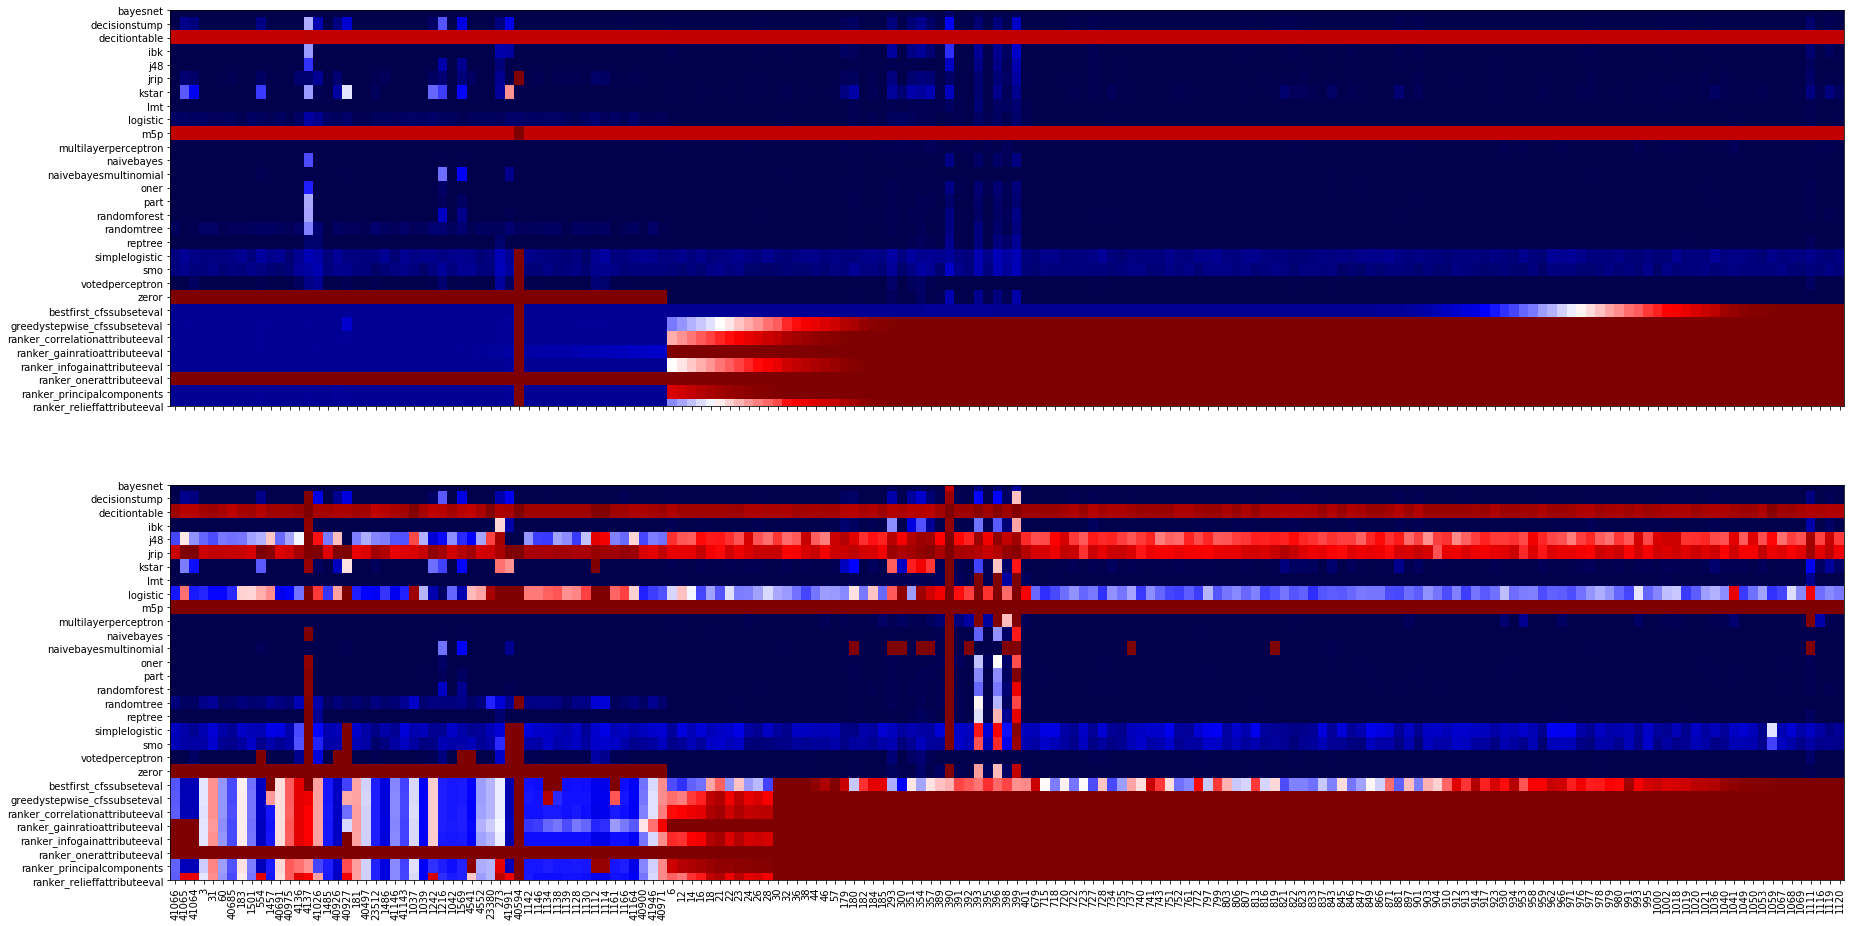

zeror: [41066, 41065, 41064, 3, 31, 60, 40685, 183, 1501, 554, 1457, 40691, 40975, 4136, 4137, 41026, 1485, 40926, 40927, 181, 40497, 23512, 1486, 41146, 41143, 1037, 1039, 1242, 1216, 1042, 1569, 4541, 4552, 23380, 273, 41991, 40594, 1142, 1146, 1134, 1138, 1139, 1128, 1130, 1112, 1114, 1161, 1166, 41164, 40900, 41946, 40971]
jrip: [40594]
m5p: [40594]
simplelogistic: [40594]
smo: [40594]
votedperceptron: [40594]
bestfirst_cfssubseteval: [40594, 1111, 1116, 1119, 1120]
greedystepwise_cfssubseteval: [40594, 357, 389, 390, 391, 392, 393, 395, 396, 398, 399, 401, 679, 715, 718, 720, 722, 723, 727, 728, 734, 735, 737, 740, 741, 743, 751, 752, 761, 772, 797, 799, 803, 806, 807, 813, 816, 819, 821, 822, 823, 833, 837, 843, 845, 846, 847, 849, 866, 871, 881, 897, 901, 903, 904, 910, 912, 913, 914, 917, 923, 930, 934, 953, 958, 959, 962, 966, 971, 976, 977, 978, 979, 980, 991, 993, 995, 1000, 1002, 1018, 1019, 1020, 1021, 1036, 1040, 1041, 1049, 1050, 1053, 1059, 1067, 1068, 1069, 1111, 1116,

In [13]:
dfDefault = pd.concat([dfDefaultClassifiers[['openmlid', 'algorithm', 'fittime', 'exception']], dfDefaultPreprocessors[['openmlid', 'algorithm', 'fittime', 'exception']]])
datasets = pd.unique(dfDefault["openmlid"])
algorithms = pd.unique(dfDefault["algorithm"])
T = np.zeros((len(datasets), len(algorithms)))
S = np.zeros((len(datasets), len(algorithms)))
pbar = tqdm(total = T.size)
missingReport = {}
for i,d in enumerate(datasets):
    dsDF = dfDefault[dfDefault["openmlid"] == d]
    for j, a in enumerate(algorithms):
        isClassifier = a in classifiers
        if isClassifier:
            expectedT = 450 # 45 fit sizes * 10 seeds
        else:
            expectedT = 3400 # 340 * 10 seeds
        expectedS = expectedT - len(dsDF[(dsDF["algorithm"] == a) & (dsDF["exception"].notnull())])
            
        seenT = len(dsDF[dsDF["algorithm"] == a])
        seenS = len(dsDF[(dsDF["algorithm"] == a) & (dsDF["exception"].isnull()) & (dsDF["fittime"].notnull())])
        T[i,j] = seenT / expectedT
        S[i,j] = seenS / expectedS if expectedS > 0 else 1
        if seenT == 0:
            if not a in missingReport:
                missingReport[a] = []
            missingReport[a].append(d)
        pbar.update(1)
pbar.close()
fig, ax = plt.subplots(2, 1, figsize=(30,16), sharex=True)
a = ax[0]
a.imshow((1 - T).T, cmap='seismic', vmin=0, vmax=1, aspect="auto")
a.set_yticks(np.arange(len(algorithms) - 1))
a.set_yticklabels(algorithms)
a = ax[1]
a.imshow((1 - S).T, cmap='seismic', vmin=0, vmax=1, aspect="auto")
a.set_yticks(np.arange(len(algorithms) - 1))
a.set_yticklabels(algorithms)
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels(datasets, rotation=90)
plt.show()

for a in missingReport:
    print(a + ": " + str(missingReport[a]))

## Availability of data for PARAMETRIZED atomic algorithms

18
4
3
4
3
4
4
5
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5



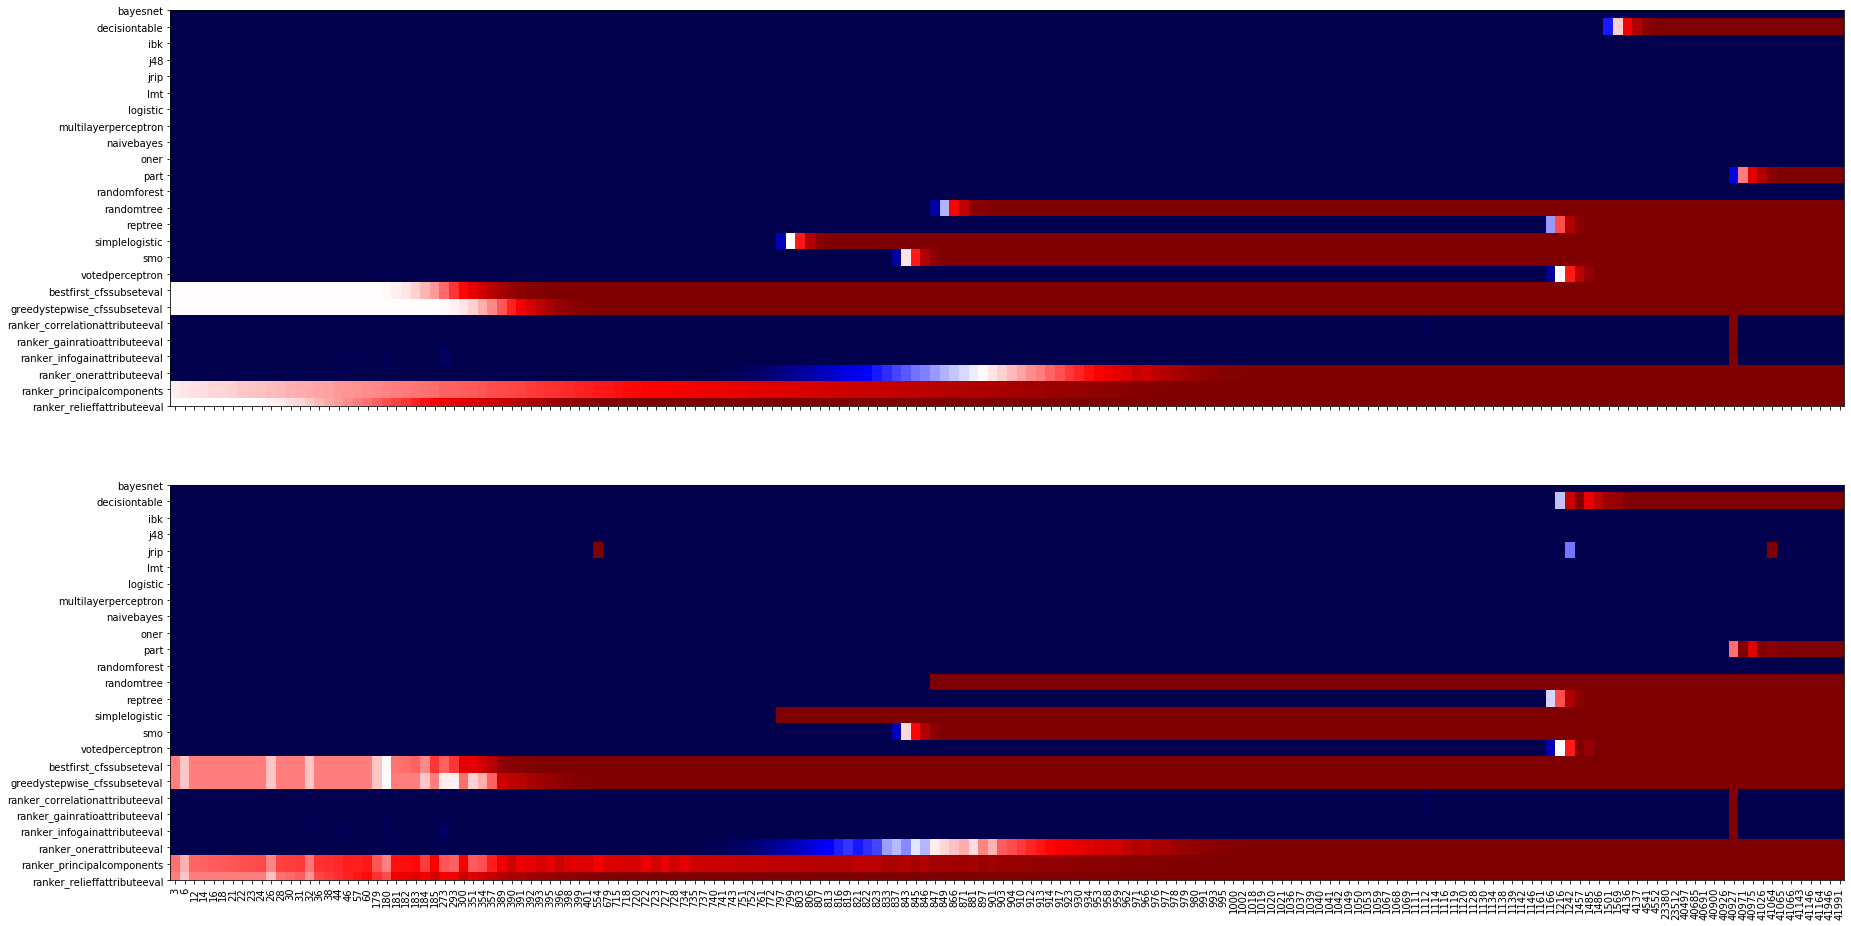

decisiontable: [4552, 23380, 23512, 40497, 40685, 40691, 40900, 40926, 40927, 40971, 40975, 41026, 41064, 41065, 41066, 41143, 41146, 41164, 41946, 41991]
part: [41065, 41066, 41143, 41146, 41164, 41946, 41991]
randomtree: [901, 903, 904, 910, 912, 913, 914, 917, 923, 930, 934, 953, 958, 959, 962, 971, 966, 976, 977, 978, 979, 980, 991, 993, 995, 1000, 1002, 1018, 1019, 1020, 1021, 1036, 1037, 1039, 1040, 1041, 1042, 1049, 1050, 1053, 1059, 1067, 1068, 1069, 1111, 1112, 1114, 1116, 1119, 1120, 1128, 1130, 1134, 1138, 1139, 1142, 1146, 1161, 1166, 1216, 1242, 1457, 1485, 1486, 1501, 1569, 4136, 4137, 4541, 4552, 23380, 23512, 40497, 40685, 40691, 40900, 40926, 40927, 40971, 40975, 41026, 41064, 41065, 41066, 41143, 41146, 41164, 41946, 41991]
reptree: [1485, 1486, 1501, 1569, 4136, 4137, 4541, 4552, 23380, 23512, 40497, 40685, 40691, 40900, 40926, 40927, 40971, 40975, 41026, 41064, 41065, 41066, 41143, 41146, 41164, 41946, 41991]
simplelogistic: [813, 816, 819, 821, 822, 823, 833, 837, 

In [14]:
dfConfigured = pd.concat([dfConfiguredClassifiers[['openmlid', 'algorithm', 'algorithmoptions', 'fitsize', 'fittime', 'exception']], dfConfiguredPreprocessors[['openmlid', 'algorithm', 'algorithmoptions', 'fitsize', 'fittime', 'exception']]])
datasets = pd.unique(dfConfigured["openmlid"])
algorithms = pd.unique(dfConfigured["algorithm"])
T = np.zeros((len(datasets), len(algorithms)))
S = np.zeros((len(datasets), len(algorithms)))
pbar = tqdm(total = T.size)
missingReport = {}
for j, a in enumerate(algorithms):
    dfAlgo = dfConfigured[dfConfigured["algorithm"] == a]
    parametrizations = len(pd.unique(dfAlgo["algorithmoptions"]))
    fitsizes = len(pd.unique(dfConfigured[dfConfigured["algorithm"] == a]["fitsize"]))
    print(fitsizes)
    for i,d in enumerate(datasets):
        dsDF = dfAlgo[dfAlgo["openmlid"] == d]
        expectedT = parametrizations * fitsizes * 10  # 45 fit sizes * 10 seeds
        expectedS = expectedT - len(dsDF[(dsDF["algorithm"] == a) & (dsDF["exception"].notnull())])
            
        seenT = len(dsDF[dsDF["algorithm"] == a])
        seenS = len(dsDF[(dsDF["algorithm"] == a) & (dsDF["exception"].isnull()) & (dsDF["fittime"].notnull())])
        T[i,j] = seenT / expectedT
        S[i,j] = seenS / expectedS if expectedS > 0 else 1
        if seenT == 0:
            if not a in missingReport:
                missingReport[a] = []
            missingReport[a].append(d)
        pbar.update(1)
pbar.close()
fig, ax = plt.subplots(2, 1, figsize=(30,16), sharex=True)
a = ax[0]
a.imshow((1 - T).T, cmap='seismic', vmin=0, vmax=1, aspect="auto")
a.set_yticks(np.arange(len(algorithms) - 1))
a.set_yticklabels(algorithms)
a = ax[1]
a.imshow((1 - S).T, cmap='seismic', vmin=0, vmax=1, aspect="auto")
a.set_yticks(np.arange(len(algorithms) - 1))
a.set_yticklabels(algorithms)
a.set_xticks(np.arange(len(datasets)))
a.set_xticklabels(datasets, rotation=90)
plt.show()

for a in missingReport:
    print(a + ": " + str(missingReport[a]))

## Availability of Meta-Features for the Observations 

In [15]:
def getRuntimesObservationsForWhichNoMetaFeaturesAreKnown(dfClassifiers, dfMetafeatures):
    rAtts = ["openmlid", "fitsize", "seed"]
    mDF = pd.DataFrame([], columns=rAtts)
    dfClassifiers = dfClassifiers[dfClassifiers["exception"].isnull()][rAtts].drop_duplicates()
    datasets = pd.unique(dfClassifiers["openmlid"])

    pbar = tqdm(total=len(dfClassifiers))
    for index, obs in dfClassifiers.iterrows():
        pbar.update(1)
        if len(dfMetafeatures.query("openmlid == " + str(obs["openmlid"]) + " and datapoints_fold1 == " + str(obs["fitsize"]) + " and seed == " + str(obs["seed"]))) == 0:
            mDF.loc[len(mDF)] = obs[rAtts]
    pbar.close()
    return mDF
mDF = getRuntimesObservationsForWhichNoMetaFeaturesAreKnown(dfDefaultClassifiers, dfMetafeatures)

In [16]:
print("Format: <openmlid>: [(<fitsize>,<seed>)...]")
for ds, group in mDF.groupby("openmlid"):
    print (str(ds) + ": " + str([(r["fitsize"], r["seed"]) for i, r in group.iterrows()]))

Format: <openmlid>: [(<fitsize>,<seed>)...]
3: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
31: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
60: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
181: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
183: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
273: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 0)]
554: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
1037: [(1, 1), (1, 3), (1, 4), (1, 7), (1, 9), (1, 6), (1, 0), (1, 2), (1, 5), (1, 8)]
1039: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
1042: [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 8), (1, 9), (1, 7)]
1111: [(2, 0), (4, 0), (2, 1), (2, 2), (4, 1), (8, 0), (16, 0), (2, 3), (4, 2), (8, 1), (2, 4), (

# Prepare Work Data

# Create a Single Runtime CSV for Atomic Algorithms

In [4]:
def resolveExceptions(df):
    # Set traintime to full traintime +1 (3601) if the exception is a timeout or is dominated by another one that timed out
    print("Len of df is " + str(len(df)))
    timeouts = []
    failedRuns = df[df["exception"].notnull()]
    failedRunsWithPositiveTime = failedRuns[failedRuns["fittime"] > 0]
    pbar = tqdm(total=len(failedRunsWithPositiveTime))
    for i, row in failedRunsWithPositiveTime.iterrows():
        pbar.update(1)
        exception = str(row["exception"])
        if exception != df.at[i, "exception"]:
            raise Exception("The access via at does not seem to work correctly at index " + str(i) + "! Expected " + str(exception) + " and found " + str(df.at[i, "exception"])  + "\n\n" + str(row) + "\n\n" + str(df.loc[i]) + "\n\nSize of df: " + str(len(df)))
        if "Timeout" in exception and row["fittime"] >= 3600:
            df.at[i, "exception"] = np.nan
            timeouts.append((row["openmlid"], row["algorithm"], row["algorithmoptions"], row["fitsize"]))
    pbar.close()
    print("Found " + str(len(timeouts)) + " timeouts. Len of df is " + str(len(df)))
    
    # now iterate over all still failed rows
    failedRuns = df[df["exception"].notna()]
    pbar = tqdm(total=len(failedRuns))
    for i, row in failedRuns.iterrows():
        exception = str(row["exception"])
        if exception != df.at[i, "exception"]:
            raise Exception("The access via at does not seem to work correctly at index " + str(i) + "! Expected " + str(exception) + " and found " + str(df.at[i, "exception"]) + "\n\n" + str(row) + "\n\n" + str(df.loc[i]) + "\n\nSize of df: " + str(len(df)))
        pbar.update(1)
        if "canceled due to" in exception:
            t = (row["openmlid"], row["algorithm"], row["algorithmoptions"], int(row["fitsize"]))
            isDominatedDueToTimeout = False
            for t2 in timeouts:
                # if the datapoint is dominated by another one due to a timeout, set the traintime to that time
                 if t2[0] == t[0] and t2[1] == t[1] and t2[2] == t[2] and t2[3] < t[3]:
                    df.at[i, "fittime"] = 3601
                    df.at[i, "exception"] = np.nan
                    break
    pbar.close()
    
    print("Removing lines with exceptions.")
    df = df[df["exception"].isnull()]
    df = df.drop(columns=["exception"])
    
    print("Now removing lines where fittime is not available.")
    df = df[df["fittime"].notnull()]
    return df

In [5]:
relevantTrainMetafeatures = ['fitsize', 'numattributes', 'numlabels', 'numnumericattributes', 'numsymbolicattributes', 'numberofcategories', 'numericattributesafterbinarization', 'totalvariance', 'attributestocover50pctvariance', 'attributestocover90pctvariance', 'attributestocover95pctvariance', 'attributestocover99pctvariance']

# prepare classifier data frame
dfClassifiers = pd.concat([dfDefaultClassifiers, dfConfiguredClassifiers], ignore_index = True, sort=False)
dfClassifiersMod = dfClassifiers.merge(dfMetafeatures, left_on=["openmlid", "fitsize", "seed"], right_on=["openmlid", "datapoints_fold1", "seed"])
dfClassifiersMod = dfClassifiersMod.merge(dfDatasets, on="openmlid").rename(columns={"numinstances": "totalsize"})
dfClassifiersMod["applicationsize"] = dfClassifiersMod["totalsize"] - dfClassifiersMod["fitsize"]
allAttributes = ['openmlid', 'totalsize', 'algorithm', 'algorithmoptions', 'seed']
allAttributes.extend(["f1_" + x for x in relevantTrainMetafeatures])
allAttributes.extend(['applicationsize', 'fittime', 'applicationtime', 'exception'])
renameDict = {}
for a in relevantTrainMetafeatures:
    if a != "numattributes":
        renameDict["f1_" + a] =  a
dfClassifiersMod = dfClassifiersMod.rename(columns=renameDict)
dfClassifiersMod = dfClassifiersMod[[x.replace("f1_", "") for x in allAttributes]]
print ("Data frame for base learners ready. Stepping to pre-processors.")

# prepare pre-processor data frame
dfPreprocessors = pd.concat([dfDefaultPreprocessors, dfConfiguredPreprocessors], ignore_index = True, sort=False)
dfPreprocessorsMod = dfPreprocessors.merge(dfDatasets, on="openmlid").rename(columns={"numinstances": "totalsize"})
dfPreprocessorsMod["applicationsize"] = dfPreprocessorsMod["totalsize"] - dfPreprocessorsMod["fitsize"]
allAttributes = ['openmlid', 'totalsize', 'algorithm', 'algorithmoptions', 'seed']
allAttributes.extend([x + "_before" for x in relevantTrainMetafeatures])
allAttributes.extend(['applicationsize', 'fittime', 'applicationtime', 'exception'])
renameDict = {}
if len(dfPreprocessorsMod.query("fitsize != numinstances_before").dropna()) > 0:
    raise Exception("Number of instance before and number of instances of merge differ!")
for a in relevantTrainMetafeatures:
    renameDict[a + "_before"] =  a
dfPreprocessorsMod = dfPreprocessorsMod.rename(columns=renameDict)
dfPreprocessorsMod = dfPreprocessorsMod[[x.replace("_before", "") for x in allAttributes]]
print ("PP-Dateframe ready.")

Data frame for base learners ready. Stepping to pre-processors.
PP-Dateframe ready.


In [6]:
# merge data frames
dfAtomic = pd.concat([dfClassifiersMod, dfPreprocessorsMod], sort=False, ignore_index = True)

### Resolve Exceptions

In [7]:
dfAtomic = resolveExceptions(dfAtomic)
print("Now removing lines where fitattributes is not available.")
dfAtomic = dfAtomic[(dfAtomic["numattributes"].notnull()) & (dfAtomic["fittime"].notnull())]
print("Ready. Prepared clean dataset.")
dfAtomic = dfAtomic.astype({"numattributes": int, "fittime": int})

Len of df is 6334974



Found 9099 timeouts. Len of df is 6334974



Removing lines with exceptions.
Now removing lines where fittime is not available.
Now removing lines where fitattributes is not available.
Ready. Prepared clean dataset.


### Write Runtime File

In [8]:
dfAtomic.to_csv("data/runtimes/runtimes_atomic.csv", index=False)

## Without Outliers

In [12]:
def removeOutliersFromBatches(df, groupfeatures, targets, maxIQRFactor = 1.5, minRangeToDrop = 30):
    groups = df.groupby(groupfeatures)
    effectiveNumberOfGroups = 0
    for gIndex, group in groups:
        effectiveNumberOfGroups += 1
    pbar = tqdm(total = effectiveNumberOfGroups)
    sizeAtStart = len(df)
    droppedIndices = []
    for gIndex, group in groups:
        bef = len(group) + 1
        cur = len(group)
        while len(group) > 0 and bef != cur:
            #if len(group) < 4:
            #    dropFromGroup = group.index
            #else:
            dropFromGroup = []
            for target in targets:
                col = group[target]
                q1 = np.quantile(col, 0.25)
                q3 = np.quantile(col, 0.75) 
                iqr = q3 - q1
                if np.max(col) - np.min(col) > minRangeToDrop:
                    dropFromGroup.extend(group[group[target] > q3 + np.max([1, iqr]) * maxIQRFactor].index)
                    dropFromGroup.extend(group[group[target] < q1 - np.max([1, iqr]) * maxIQRFactor].index)
            droppedIndices.extend(set(dropFromGroup))
            group = group.drop(index = dropFromGroup)
            bef = cur
            cur = len(group)
        pbar.update(1)
    pbar.close()
    df = df.drop(index = set(droppedIndices))
    sizeAtEnd = len(df)
    print("Size after outlier removal: " + str(sizeAtEnd) + ". Removed: " + str(sizeAtStart - sizeAtEnd))
    return df

def dropStronglyDivergingMaximaFromBatches(df):
    toDrop = []
    groups = df.groupby(["openmlid", "algorithm", "algorithmoptions", "fitsize", "numattributes"])
    numberOfGroups = 0
    for gIndex, g in groups:
        numberOfGroups += 1
    
    pbar = tqdm(total = numberOfGroups)
    for ig, group in groups:
        col = group["applicationtime"]
        col = col[~np.isnan(col)]
        if len(col) == 0:
            continue

        median = np.quantile(col, 0.5, interpolation="lower")
        while median - np.min(col) < 120 and np.max(col) - median > 100:
            toDropHere = col[col == np.max(col)].index
            toDrop.extend(toDropHere)
            group = group.drop(index = toDropHere)
            col = group["applicationtime"]
            col = col[~np.isnan(col)]
            median = np.quantile(col, 0.5, interpolation="lower")

        while np.max(col) - median > 60:
            toDropHere = col[col == np.max(col)].index
            toDrop.extend(toDropHere)
            group = group.drop(index = toDropHere)
            col = group["applicationtime"]
            col = col[~np.isnan(col)]
            median = np.quantile(col, 0.5, interpolation="lower")
        pbar.update(1)
    pbar.close()
    print("Removing " + str(len(toDrop)) + " entries")
    return df.drop(index = toDrop)

#dfBAWithoutOutliers = removeOutliersFromBatches(dfBA, ["openmlid", "algorithm", "algorithmoptions", "fitsize", "numattributes"], ["fittime", "applicationtime"])
#dfBAWithoutOutliers = dropStronglyDivergingMaximaFromBatches(dfBAWithoutOutliers)
#dfBAWithoutOutliers.to_csv("data/runtimes/runtimes_atomic_nooutliers.csv", index=False)

In [13]:
dfBA = pd.read_csv("data/runtimes/runtimes_atomic.csv")

dfDefault = dfBA[dfBA["algorithmoptions"].isnull()]
dfConfigured = dfBA[dfBA["algorithmoptions"].notnull()]

bef = len(dfDefault)
dfWOODefault = dfDefault
while True:
    dfWOODefault = removeOutliersFromBatches(dfWOODefault, ["openmlid", "algorithm", "fitsize", "numattributes"], ["fittime", "applicationtime"], maxIQRFactor = .5)
    bef = len(dfWOODefault) # this outlier removal is idempotent
    dfWOODefault = dropStronglyDivergingMaximaFromBatches(dfWOODefault)
    if len(dfWOODefault) == bef:
        break
    bef = len(dfWOODefault)

bef = len(dfConfigured)
dfWOOConfigured = dfConfigured
while True:
    dfWOOConfigured = removeOutliersFromBatches(dfWOOConfigured, ["openmlid", "algorithm", "algorithmoptions", "fitsize", "numattributes"], ["fittime", "applicationtime"], maxIQRFactor = .5)
    bef = len(dfWOOConfigured) # this outlier removal is idempotent
    dfWOOConfigured = dropStronglyDivergingMaximaFromBatches(dfWOOConfigured)
    if len(dfWOOConfigured) == bef:
        break
    bef = len(dfWOOConfigured)

dfWOO = pd.concat([dfWOODefault, dfWOOConfigured], sort=False, ignore_index = True)
dfWOO.to_csv("data/runtimes/runtimes_atomic_nooutliers.csv", index=False)


Size after outlier removal: 940774. Removed: 128843



Removing 0 entries



Size after outlier removal: 2096313. Removed: 53063



Removing 14378 entries



Size after outlier removal: 2080161. Removed: 1774



Removing 3 entries



Size after outlier removal: 2080157. Removed: 1



Removing 0 entries


(3, 1000.0, 36) - applicationtime (n=5)
iqr = 4.0
max = 35.0
TRUE MAX: 54.0


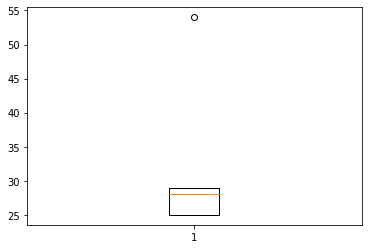

(12, 400.0, 216) - applicationtime (n=4)
iqr = 8.25
max = 20.625
TRUE MAX: 30.0


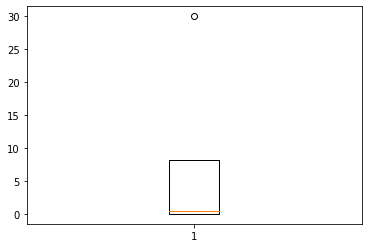

(44, 16.0, 57) - applicationtime (n=4)
iqr = 6.0
max = 15.0
TRUE MAX: 24.0


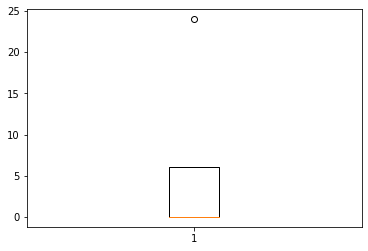

(46, 200.0, 61) - applicationtime (n=4)
iqr = 7.25
max = 19.875
TRUE MAX: 27.0


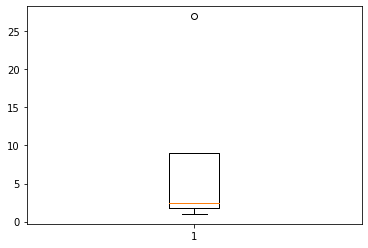

(679, 400.0, 2) - applicationtime (n=4)
iqr = 6.5
max = 16.25
TRUE MAX: 26.0


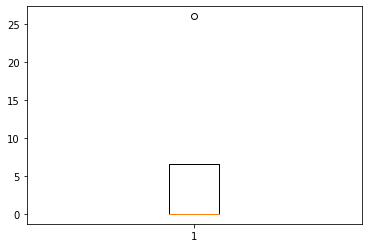

(806, 8.0, 50) - applicationtime (n=4)
iqr = 8.0
max = 20.0
TRUE MAX: 29.0


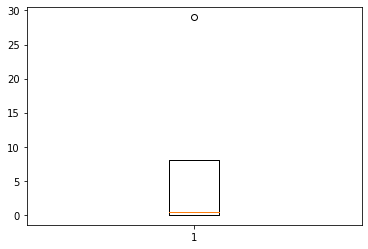

(819, 50.0, 6) - applicationtime (n=4)
iqr = 7.75
max = 19.375
TRUE MAX: 28.0


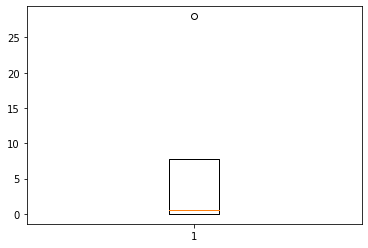

(971, 500.0, 76) - applicationtime (n=5)
iqr = 1.0
max = 2.5
TRUE MAX: 27.0


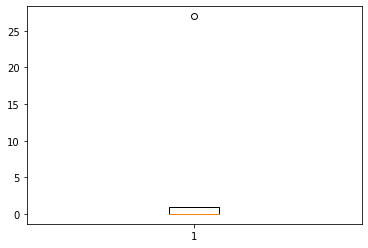

(977, 300.0, 16) - applicationtime (n=4)
iqr = 8.25
max = 21.625
TRUE MAX: 28.0


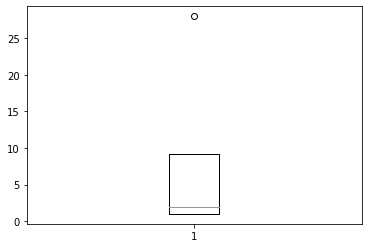

(980, 100.0, 64) - applicationtime (n=5)
iqr = 1.0
max = 2.5
TRUE MAX: 30.0


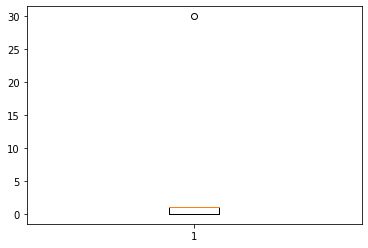

(1019, 4000.0, 16) - applicationtime (n=4)
iqr = 7.75
max = 19.375
TRUE MAX: 28.0


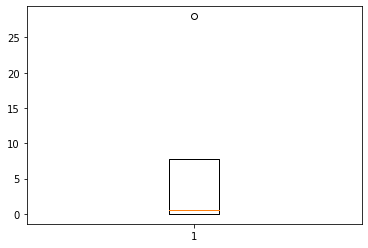

(1021, 600.0, 10) - applicationtime (n=5)
iqr = 1.0
max = 2.5
TRUE MAX: 26.0


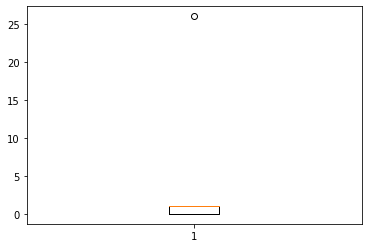

(1053, 2500.0, 21) - applicationtime (n=4)
iqr = 6.0
max = 15.0
TRUE MAX: 24.0


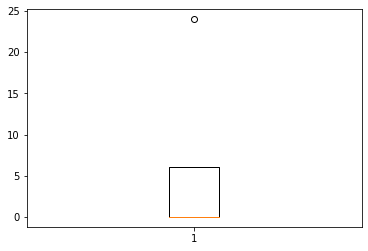

(1130, 16.0, 10936) - applicationtime (n=4)
iqr = 7.75
max = 357.625
TRUE MAX: 364.0


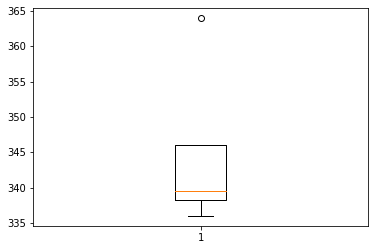

(1139, 75.0, 10936) - applicationtime (n=4)
iqr = 8.0
max = 353.75
TRUE MAX: 362.0


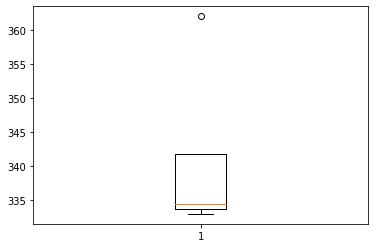

(4552, 2000.0, 16) - applicationtime (n=5)
iqr = 4.0
max = 60.0
TRUE MAX: 79.0


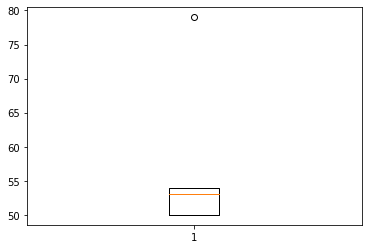

69.90514874724904


In [63]:
def getBatchesWithHighVariance(df, batchAttributes, targets, threshold):
    
    if type(targets) != list:
        targets = [targets]
    
    # First compute dispersions
    groups = df.groupby(batchAttributes)
    maxM = 10000000
    M = 0
    stds = []
    for j, subGroup in groups:
        for target in targets:
            std = np.nanstd(subGroup[target])
            stds.append(std)
            if std >= threshold:
                q1 = np.quantile(subGroup[target], 0.25)
                q3 = np.quantile(subGroup[target], 0.75)
                iqr = q3 - q1
                supposedMax = q3 + 1.5 * iqr
                trueMax = np.max(subGroup[target])
                if trueMax > supposedMax:
                    print(str(j) + " - " + target + " (n=" + str(len(subGroup)) + ")")
                    print("iqr = " + str(iqr))
                    print("max = " + str(supposedMax))
                    print("TRUE MAX: " + str(trueMax))
                    plt.figure()
                    plt.boxplot(subGroup[target])
                    plt.show()
                M += 1
                if M == maxM:
                    return
    print(sp.stats.trim_mean(stds, 0.1))
getBatchesWithHighVariance(dfWOODefault[dfWOODefault["algorithm"] == "j48"], ["openmlid", "fitsize", "numattributes"], ["applicationtime"], 10)

In [38]:
dfWOOConfigured2.query("algorithm == 'logistic' and algorithmoptions=='-R 0.000001' and openmlid == 179 and fitsize == 1000 and numattributes == 14")

,openmlid,totalsize,algorithm,algorithmoptions,seed,numattributes,numlabels,numnumericattributes,numsymbolicattributes,numberofcategories,numericattributesafterbinarization,totalvariance,attributestocover50pctvariance,attributestocover90pctvariance,attributestocover95pctvariance,attributestocover99pctvariance,fitsize,applicationsize,fittime,applicationtime
506042,179,48842,logistic,-R 0.000001,0,14,2.0,2.0,12.0,119.0,120.0,1.204176e+10,1.0,1.0,1.0,1.0,1000.0,47842.0,2,6.0
506385,179,48842,logistic,-R 0.000001,1,14,2.0,2.0,12.0,119.0,120.0,1.204176e+10,1.0,1.0,1.0,1.0,1000.0,47842.0,1,10.0
506733,179,48842,logistic,-R 0.000001,2,14,2.0,2.0,12.0,119.0,120.0,1.204225e+10,1.0,1.0,1.0,1.0,1000.0,47842.0,1,9.0
509216,179,48842,logistic,-R 0.000001,9,14,2.0,2.0,12.0,119.0,120.0,NaN,NaN,NaN,NaN,NaN,1000.0,47842.0,1,66.0


## Create archive with all runtimes and the corresponding default runtimes

In [4]:
dfBA = pd.read_csv("data/runtimes/runtimes_atomic_nooutliers.csv")
#dfBADefault = dfBA[dfBA["algorithmoptions"].isnull()]
#dfBACombined = dfBA.merge(dfBADefault, on=["openmlid", "algorithm", "seed"], suffixes=("", "_def"))

In [5]:
print(len(dfBA))
#print(len(dfBACombined))

2724011


# Compile One CSV-File per Atomic Algorithm

In [4]:
df = pd.read_csv("data/runtimes/runtimes_atomic_nooutliers.csv")
algorithms = pd.unique(df["algorithm"])
for a in tqdm(algorithms):
    print(a)
    dfAlg = df[df["algorithm"] == a]
    dfAlgDefaults = dfAlg[dfAlg["algorithmoptions"].isnull()]
    dfAlgParametrized = dfAlg[dfAlg["algorithmoptions"].notnull()]
    if len(dfAlgParametrized) > 0:
        print(len(dfAlgParametrized))
        columns = ["openmlid", "totalsize", "fitsize", "applicationsize", "numattributes", "seed", "algorithm", "algorithmoptions", "fittime", "applicationtime"]
        dfAlgParametrized = dfAlgParametrized.merge(dfAlgDefaults, on=["openmlid", "algorithm", "seed", "fitsize"], suffixes=("", "_def"))
        print(len(dfAlgParametrized))
        columns.append("fittime_def")
        columns.append("applicationtime_def")
        columnsbeforeExplosion = list(dfAlgParametrized.columns)
        dfAlgParametrized = explodeAlgorithmOptions(dfAlgParametrized, False)
        algoParams = [x for x in dfAlgParametrized.columns if not x in columnsbeforeExplosion]
        for x in ["searcheroptions", "evaloptions"]:
            if x in algoParams:
                algoParams.remove(x)
        columns.extend(algoParams)
        print(columns)
        dfAlgParametrized[columns].to_csv("data/runtimes/atomic/runtimes_" + a + "_parametrized.csv", index=False)
    if len(dfAlgDefaults) > 0:
        dfAlgDefaults.to_csv("data/runtimes/atomic/runtimes_" + a + "_default.csv", index=False)

/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


bayesnet
58105
49883
['openmlid', 'totalsize', 'fitsize', 'applicationsize', 'numattributes', 'seed', 'algorithm', 'algorithmoptions', 'fittime', 'applicationtime', 'fittime_def', 'applicationtime_def', 'D', 'Q']
decisionstump
decisiontable
52556
42030
['openmlid', 'totalsize', 'fitsize', 'applicationsize', 'numattributes', 'seed', 'algorithm', 'algorithmoptions', 'fittime', 'applicationtime', 'fittime_def', 'applicationtime_def', 'I', 'X', 'E', 'S']
ibk
8865
6511
['openmlid', 'totalsize', 'fitsize', 'applicationsize', 'numattributes', 'seed', 'algorithm', 'algorithmoptions', 'fittime', 'applicationtime', 'fittime_def', 'applicationtime_def', 'I', 'F', 'E', 'X', 'K']
kstar
multilayerperceptron
65849
51025
['openmlid', 'totalsize', 'fitsize', 'applicationsize', 'numattributes', 'seed', 'algorithm', 'algorithmoptions', 'fittime', 'applicationtime', 'fittime_def', 'applicationtime_def', 'B', 'R', 'C', 'D', 'L', 'M', 'H']
naivebayes
6003
5102
['openmlid', 'totalsize', 'fitsize', 'applicati

In [9]:
def getAllMetalearnerRuntimesWithMetafeaturesForDefault():
    
    # read in basic datasets
    print("Read in data")
    dfDatasets = pd.read_csv("data/datasets.csv").rename(columns={"numinstances": "totalsize"})
    dfMetafeatures = pd.read_csv("data/metafeatures.csv", delimiter=";")
    dfClassifiers = pd.read_csv("data/rawruntimes/runtimes_metalearners_default.csv", delimiter=";")
    dfClassifiers = dfClassifiers[~dfClassifiers["fittime"].isnull()]
    df = dfClassifiers.merge(dfMetafeatures, left_on=["openmlid", "fitsize", "seed"], right_on=["openmlid", "datapoints_fold1", "seed"])
    df = df.merge(dfDatasets, on=["openmlid"])
    df["applicationsize"] = df["totalsize"] - df["fitsize"]
    df = df.rename(columns={"f1_numericattributesafterbinarization": "fitattributes"})
    df = df[~df["fitattributes"].isnull()]
    df = df[['experiment_id', 'openmlid', 'totalsize', 'fitsize', 'applicationsize', 'fitattributes', 'seed', 'algorithm', 'baselearner', 'fittime', 'applicationtime', 'exception']]
    
    df = resolveExceptions(df)

    print("Now removing lines where fitattributes is not available.")
    df = df[df["fitattributes"].notnull()]
    print("Ready. Prepared clean dataset.")
    return df.astype({"fitattributes": int, "fittime": int}).copy()

df = getAllMetalearnerRuntimesWithMetafeaturesForDefault()
df.to_csv("data/runtimes/runtimes_meta_default.csv", index=False)

Read in data
Len of df is 45742



Found 1139 timeouts. Len of df is 45742



Removing lines with exceptions.
Now removing lines where fittime is not available.
Now removing lines where fitattributes is not available.
Ready. Prepared clean dataset.


# Create Complete META FEATURE TRANSFORMATION CSV

In [11]:
# read in data
df = pd.read_csv(FILE_PREPROCESSORS_PARAMETRIZED, delimiter=";").merge(dfDatasets, on='openmlid')
df[['openmlid', 'algorithm', 'algorithmoptions',
       'numinstances_before', 'numattributes_before',
       'numlabels_before', 'numnumericattributes_before',
       'numsymbolicattributes_before', 'numberofcategories_before',
       'numericattributesafterbinarization_before',
       'attributestocover50pctvariance_before',
       'attributestocover90pctvariance_before',
       'attributestocover95pctvariance_before',
       'attributestocover99pctvariance_before', 'totalvariance_before', 'numinstances_after',
       'numattributes_after', 'numlabels_after', 'numnumericattributes_after',
       'numsymbolicattributes_after', 'numberofcategories_after',
       'numericattributesafterbinarization_after',
       'attributestocover50pctvariance_after',
       'attributestocover90pctvariance_after',
       'attributestocover95pctvariance_after',
       'attributestocover99pctvariance_after', 'totalvariance_after']].dropna().to_csv("data/metafeaturetransformations.csv", index=False)

# Compose Meta-Learner Runtime Parameters From Observations

In [7]:
bareCallFeatures = ['numberOfDistributionCalls', 'numberOfDistributionSCalls', 'numberOfClassifyInstanceCalls', 'numberOfBuildClassifierCalls']
callFeatures = []
callFeatures.extend([f + "_training" for f in bareCallFeatures])
callFeatures.extend([f + "_prediction" for f in bareCallFeatures])
relevantColsOfInfos = ['algorithm', 'experiment_id', 'datasetMetafeatures']
relevantColsOfInfos.extend(callFeatures)
dfInfoDefault = pd.read_csv("data/rawruntimes/additional_information_metalearners_default.csv", delimiter=";")[relevantColsOfInfos]
dfInfoParametrized = pd.read_csv("data/rawruntimes/additional_information_metalearners_parametrized.csv", delimiter=";")[relevantColsOfInfos]
dfRuntimesDefault = pd.read_csv("data/rawruntimes/runtimes_metalearners_default.csv", delimiter=";")
dfRuntimesParametrized = pd.read_csv("data/rawruntimes/runtimes_metalearners_parametrized.csv", delimiter=";")

# merge the frames with the information of the parametrized meta-learner 
dfParametrized = dfInfoParametrized.merge(dfRuntimesParametrized, on=["algorithm", "experiment_id"])
dfParametrized = dfParametrized.merge(dfDatasets, on=["openmlid"])

# create a clean new dataframe that only contains those entries where the number of runs is as expected
cleanDF = dfParametrized.drop(dfParametrized.index)
for i, group in tqdm(dfParametrized.groupby(["algorithm", "baselearner", "experiment_id"])):
    k = np.sum(group["numberOfBuildClassifierCalls_training"])
    options = str(pd.unique(group["algorithmoptions"])[0])
    expectedK = int(options.split(" ")[options.split(" ").index("-I") + 1])
    if k == expectedK:
        callInfos = group.drop_duplicates().copy()
        callInfos["k"] = k
        if len(callInfos) == 1:
            cleanDF = pd.concat([cleanDF, callInfos], sort=False)
cleanDF["predictioncalls_training"] = np.max([cleanDF["numberOfClassifyInstanceCalls_training"], cleanDF["numberOfDistributionCalls_training"]], axis=0)
cleanDF["predictioncalls_prediction"] = np.max([cleanDF["numberOfClassifyInstanceCalls_prediction"], cleanDF["numberOfDistributionCalls_prediction"]], axis=0)
cleanDF["numinstances_sub"] = [map2dict(x)["numinstances"] for x in cleanDF["datasetMetafeatures"]]
cleanDF["numattributes_sub"] = [map2dict(x)["numattributes"] for x in cleanDF["datasetMetafeatures"]]
cleanDF.astype({"k": int}).rename(columns={"k": "builds"})[['openmlid', 'algorithm', 'algorithmoptions', 'numinstances', 'numattributes', 
       'numattributesafterbinarization', 'trainpoints', 'numinstances_sub', 'numattributes_sub', 'builds', 'predictioncalls_training', 'predictioncalls_prediction']].drop_duplicates().to_csv("data/metalearner_parametereffects.csv", index=False)

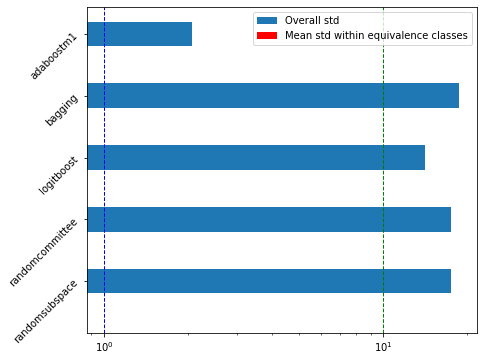

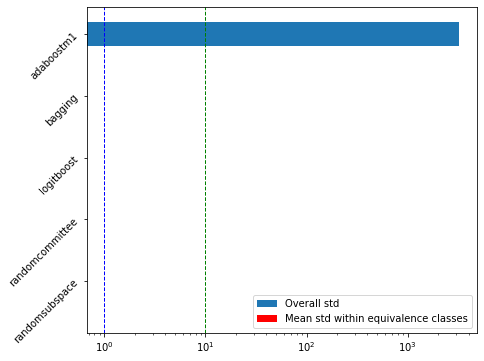

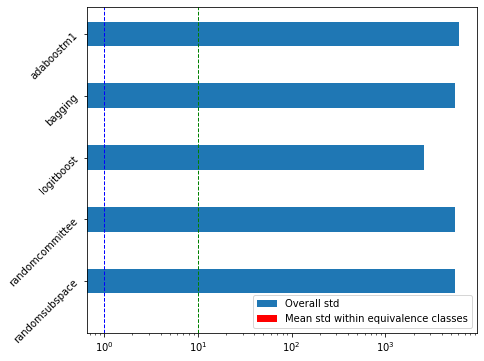

In [8]:
# This is just to check that the parameter effects are deterministic (there should be no red bars)
nextDF = pd.read_csv("data/metalearner_parametereffects.csv")
for att in ["builds", "predictioncalls_training", "predictioncalls_prediction"]:
    plotDispersion(nextDF, "algorithm", ["algorithmoptions", "numinstances", "trainpoints"], att)
    plt.show()

## Create own model for each META Learner with the parameters

In [2]:
dfMeta = pd.read_csv("data/metalearner_parametereffects.csv")

In [15]:
dfMeta

,openmlid,algorithm,algorithmoptions,numinstances,numattributes,numattributesafterbinarization,trainpoints,numinstances_sub,numattributes_sub,builds,predictioncalls_training,predictioncalls_prediction
0,6,adaboostm1,-P 70 -I 5,20000,16,16,10000,10000,16,5,10000,10000
1,6,adaboostm1,-P 90 -I 5,20000,16,16,10000,10000,16,5,10000,10000
2,6,adaboostm1,-P 80 -I 5,20000,16,16,10000,10000,16,5,10000,10000
3,21,adaboostm1,-P 90 -I 5,1728,6,21,1000,1000,6,5,1000,728
4,18,adaboostm1,-P 90 -I 5,2000,6,6,1000,1000,6,5,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...
715,24,randomsubspace,-P 70 -I 5,8124,22,121,1000,1000,22,5,0,7124
716,22,randomsubspace,-P 90 -I 5,2000,47,47,1000,1000,47,5,0,1000
717,23,randomsubspace,-P 90 -I 5,1473,9,21,1000,1000,9,5,0,473
718,24,randomsubspace,-P 80 -I 5,8124,22,121,1000,1000,22,5,0,7124


In [14]:
for algo in tqdm(pd.unique(dfMeta["algorithm"])):
    dfML = dfMeta[dfMeta["algorithm"] == algo].copy()
    if algo != "randomcommittee":
        dfML["P"] = [int(readNumericParameterFromOptionString(x, "P", 100)) for x in dfML["algorithmoptions"]]
    dfML["I"] = [int(readNumericParameterFromOptionString(x, "I", 10)) for x in dfML["algorithmoptions"]]
    if algo == "adaboostm1":
        dfML["Q"] = [readBinaryParameterFromOptionString(s, "Q") for s in dfML["algorithmoptions"]]
    if algo == "logitboost":
        dfML["L"] = [readNumericParameterFromOptionString(s, "L", -1) for s in dfML["algorithmoptions"]]
        dfML["H"] = [readNumericParameterFromOptionString(s, "H", -1) for s in dfML["algorithmoptions"]]
        dfML["Z"] = [int(readNumericParameterFromOptionString(s, "Z", -1)) for s in dfML["algorithmoptions"]]
    dfML.to_csv("data/metalearner_parametereffects_" + algo + ".csv", index=False)

# Experimental Stuff

2148
1944
1721


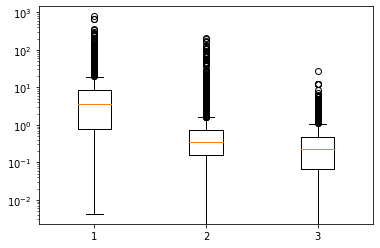

In [30]:
reg = sk.ensemble.RandomForestRegressor(n_estimators = 20)
algo = "ann"
data = []
for (label, myDF) in [("complete", df), ("no outliers", dfNoOutliers), ("really no outliers", dfReallyNoOutliers)]:
    dfFocus = myDF.query("algorithm == '" + algo + "'").dropna()
    datasets = [41066, 3, 60, 718, 881, 930, 1069, 1067, 1120]
    dfTrain = dfFocus[~dfFocus["openmlid"].isin(datasets)]
    features = ["fitsize", "fitattributes"]
    X = dfTrain[features]
    Y = dfTrain["applicationtimeperunit"] * 1000
    reg.fit(X, Y)
    dfPredict = dfFocus[dfFocus["openmlid"].isin(datasets)]
    errors = []
    for i, row in dfPredict.iterrows():
        p = reg.predict([row[features].values])
        error = np.abs(p-row["applicationtimeperunit"]  * 1000)
        errors.append(error[0])
        #print(str(p) + "/" + str(row["applicationtimeperunit"]  * 1000))
    #print(errors)
    print(len(errors))
    data.append(errors)

    